In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
class epsilon_greedy:
  def __init__(self, n_arm, reward_func, eps=0.1):
    self.n_arm = n_arm # number of arms
    self.arm_avg = np.zeros(n_arm) # the avg arm reward for each arm
    self.arm_pick = np.zeros(n_arm) # stores the number of times each arm has been
    self.eps = eps
    self.its = 0 # number pf total iterations
    self.reward_func = reward_func
    self.rews = []

  def update(self, its):
    self.its += its
    for i in range(its):
      rand_eps = np.random.uniform(0,1,1)[0]
      if rand_eps < self.eps:
        arm = np.random.choice(self.n_arm, 1)[0]
      else:
        arm = self.best_arm()
      reward = self.reward_func[arm]()
      numerator = (self.arm_avg[arm]*self.arm_pick[arm] + reward)
      self.arm_pick[arm] += 1
      denominator = self.arm_pick[arm]
      self.arm_avg[arm] = numerator / denominator
      self.rews.append(reward)

  def best_arm(self):
    return np.argmax(self.arm_avg)

  def plotter(self):
       # A function to print the plot
    rews = np.cumsum(self.rews).astype(float)
    for i in range(len(rews)):
      rews[i] = rews[i]/(i+1.0)
    plt.plot(range(1,len(rews)+1),rews)

  def get_arm_avg(self):
    return self.arm_avg


In [ ]:
import random
decide = random.random()
if decide < 0.25:
  num1 = np.random.normal(2,1)
elif decide >= 0.25 and decide <0.5:
  num2 = random.random()
  if num2 < 0.5:
    num1 = 5
  elif num2 >= 0.5:
    num1 = -6
elif decide >= 0.5 and decide < 0.75:
  num1 =  np.random.poisson(2)
elif decide >= 0.75:
  num1 =  np.random.exponential(3)

ran_n2 = random.random()
if ran_n2 < 0.5:
  rew2 = 5
elif ran_n2 >= 0.5:
  rew2 = -6

bandits = [
    lambda : np.random.normal(2,1), # gaussian ditribution with mean = 2, variance = 1
    lambda : rew2,
    lambda : np.random.poisson(2),
    lambda : np.random.exponential(3),
    lambda : num1,

]



3
3
0


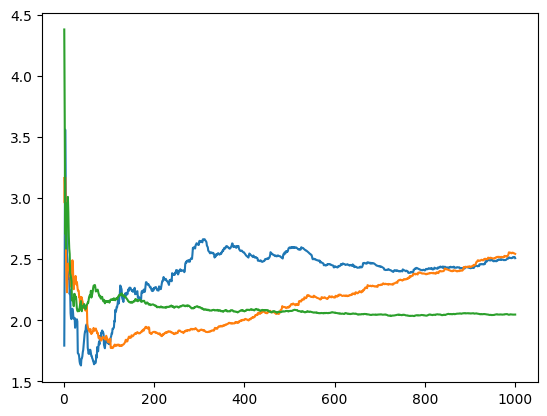

In [ ]:
#plotting the best bandit
obj = epsilon_greedy(5,bandits,0.1) #blue
obj.update(1000)
print(obj.best_arm())
obj.plotter()


obj = epsilon_greedy(5,bandits,0.01) #orange
obj.update(1000)
print(obj.best_arm())
obj.plotter()



obj = epsilon_greedy(5,bandits,0) #green
obj.update(1000)
print(obj.best_arm())
obj.plotter()

3
2.508230028653886
0.9681095452479827


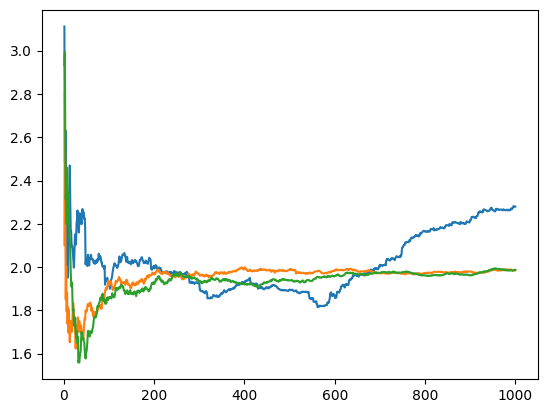

In [ ]:
obj = epsilon_greedy(5,bandits,0.1) #blue
obj.update(1000)
print(obj.rews[-1])
obj.plotter()

obj = epsilon_greedy(5,bandits,0.01) #orange
obj.update(1000)
print(obj.rews[-1])
obj.plotter()

obj = epsilon_greedy(5,bandits,0) #green
obj.update(1000)
print(obj.rews[-1])
obj.plotter()